# Part 4:
## Comparing Classifiers for Building a Classification Model
<!--  -->
* In this notebook I will be building a regression model of thrombopoietin receptor using the random forest algorithm.

 The regression model will allow me to predict the pEC50 value which is the degree at which a molecule can inhibit or not inhibit the target protein of interest (if it can inhibit then it can be a good drug candidate. Afterwards, they will need to be subjected to further scrutiny such as their pharmacokinetic profiles (ADMET properties encompassing the properties of molecules pertaining to Absorption, Distribution, Metabolism, Excretion and Toxicity)

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Quick note:
<!--  -->
In part three of the project I prepared the Pubchem fingerprints. Previous to that I prepared the Lipinksi descriptors.

So what's the difference between these two?

The Lipinski descriptor will provide me with a simple molecular descriptors. They will essentially be giving me a quick overview of the drug like properties of the molecule. The lipinski descriptors will be describing the global features.

For the Pubchem fingerprints, it is secribing the local features of the molecules. The local features mean that each molecule will be described by the unique building blocks of the molecule. 

If you think of molecules as lego building blocks, each molecule will be comprised of several lego building blocks. The way in which the building blocks are connected, will create unique properties for the drug. That is the essence of drug discovery and design. Essentially the connectivity of the lego blocks are giving rise to the unique structure of the molecule and its properties.

I need to find a way to re-arrange the lego blocks in such a way that the molecule provides the most potency towards the target protien that it wants to interact with. While also being safe and not so toxic. 

In [2]:
df = pd.read_csv('data/bioactivity_data_class_pEC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pEC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.397940
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.154902
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.698970
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.657577
262,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.508638
263,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.585027
264,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.376751


INPUT FEATURES:
* The dataset contains 882 input features and 1 output variable (pEC50).

* Think of the input features from Pubchem as a unique fingerprint. Each molecule will be given a uique fingerprint. 

* The unique fingerprint of each molecule will allow the ML algorithm to learn from the unique properties. 

* Then create a model that will be able to distinguish between compounds that are active and inactive. 

The goal of the model building is to see which functional group or fingerprint are essential for designing a good drug. Or potent drug. 

The target variable I am using for my prediction is called pEC50. This is the inhabition concentration at 50%

In [3]:
# Input Features:
# * Drop the pEC50 column because it will be used as the Y variable
X = df.drop('pEC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
262,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
263,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
264,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Output Features:
Y = df.pEC50
Y

0      6.397940
1      7.154902
2      5.000000
3      6.698970
4      7.698970
         ...   
261    7.657577
262    7.508638
263    7.585027
264    7.376751
265    7.337242
Name: pEC50, Length: 266, dtype: float64

In [5]:
# TODO: Examine data dimension 
X.shape

(266, 881)

In [6]:
Y.shape

(266,)

In [7]:
# TODO: Remove the low varience features
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))

X = selection.fit_transform(X)

In [8]:
# I am left with 129 fingerprints from 881
X.shape

(266, 129)

In [9]:
# TODO: Data Split (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((212, 129), (212,))

In [11]:
X_test.shape, Y_test.shape

((54, 129), (54,))

In [14]:
# TODO: Building a regression model using random forest 
# Setting the seed number to get the same output
np.random.seed(100)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

# The r2 tells me the Goodness of Fit of the model
r2 = model.score(X_test,Y_test)
r2

0.2390255357528983

In [15]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

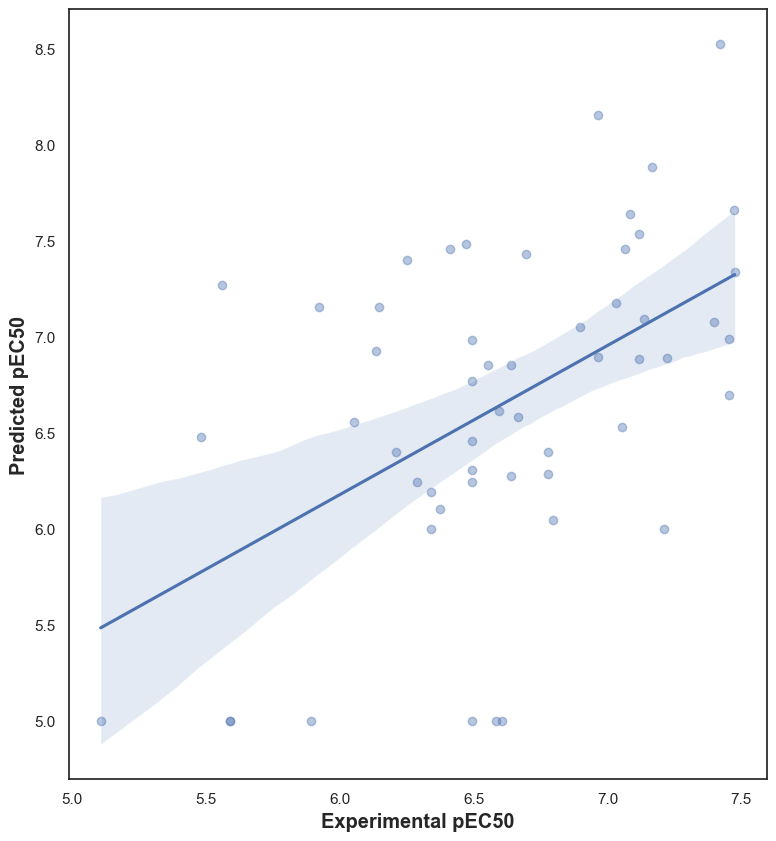

In [36]:
# TODO: Scatter Plot of Experimental vs Predicted pEC50 values
sns.set(color_codes=True)
sns.set_style("white")

x = Y_pred
y = Y_test

ax = sns.regplot(x=x, y=y, scatter_kws={'alpha':0.4})

ax.set_xlabel('Experimental pEC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pEC50', fontsize='large', fontweight='bold')

# ax.set_xlim(12, 0)
# ax.set_ylim(12, 0)

ax.figure.set_size_inches(9,10)
plt.show